In [37]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!pip install keras numpy matplotlib mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn


In [40]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [41]:
xtrain.shape

(60000, 28, 28)

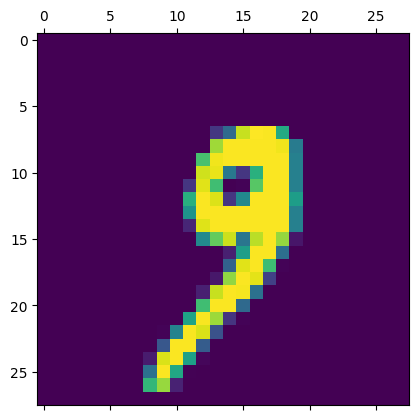

In [42]:
plt.matshow(xtest[1000])

In [43]:
# data normalization / scaling / scale down ( na korle accuracy kom ashbe )
xtext=xtest/255
xtrain=xtrain/255

In [44]:
xtest[1000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [45]:
# flutten image 28*28=784
xtrain=xtrain.reshape(-1,784)
xtest=xtest.reshape(-1,784)

In [46]:
xtrain[1000].shape

(784,)

In [55]:
# build model (sequential or functional)
#sequential model (1 ta input, 1ta output, 1ta hidden layer)
model=keras.Sequential()
model.add(Dense(96,activation='relu',input_dim=784)) #input layer 64 neuron
model.add(Dense(96,activation='relu')) #hidden layer 64 neuron
model.add(Dense(10,activation='softmax')) #output layer 10 neuron

In [56]:
#compile model / loss calculate
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
#train the model
model.fit(xtrain, 
          to_categorical(ytrain),
          epochs=10, # output and epochs equal 
          batch_size=32,
          )

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2450 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1066 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0762 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0601 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0470 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0395 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0321 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0279 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0231 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0

In [58]:
#evaluate model
model.evaluate(xtest, to_categorical(ytest))

313/313 [==============================] - 1s 2ms/step - loss: 19.8602 - accuracy: 0.9770


[19.860246658325195, 0.9769999980926514]

In [59]:
pred=model.predict(xtest)
pred

313/313 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , ..., 0.99999994, 0.        ,
        0.        ],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [60]:
np.argmax(pred[1000])

9

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth values ')

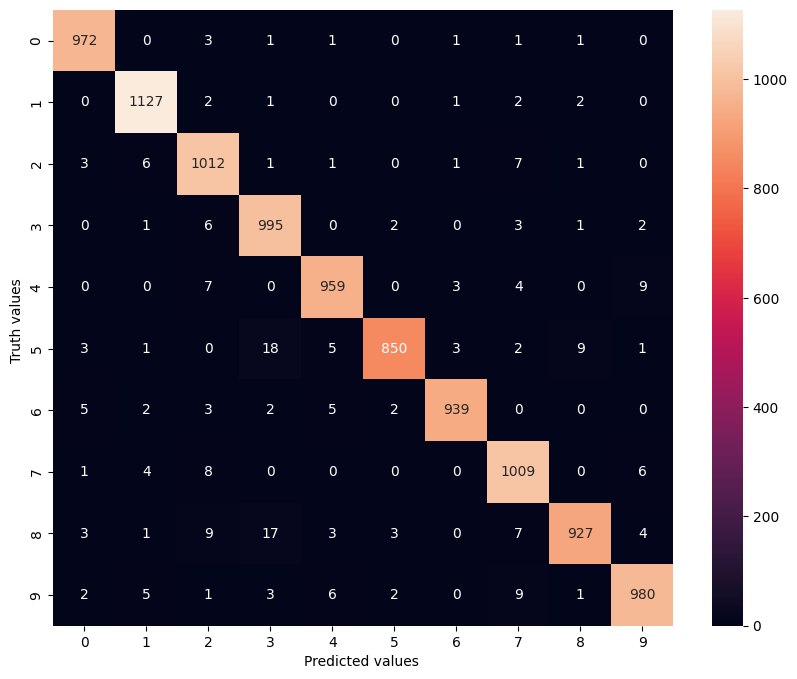

In [61]:
y_pred=model.predict(xtest)
y_pred=[np.argmax(i) for i in y_pred]
con_matrix= tf.math.confusion_matrix(labels=ytest, predictions=y_pred)
plt.figure(figsize = (10,8))
seaborn.heatmap(con_matrix, annot=True, fmt='d')
plt.xlabel('Predicted values ')
plt.ylabel('Truth values ')

